# Lab Segmentation 2

In [67]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


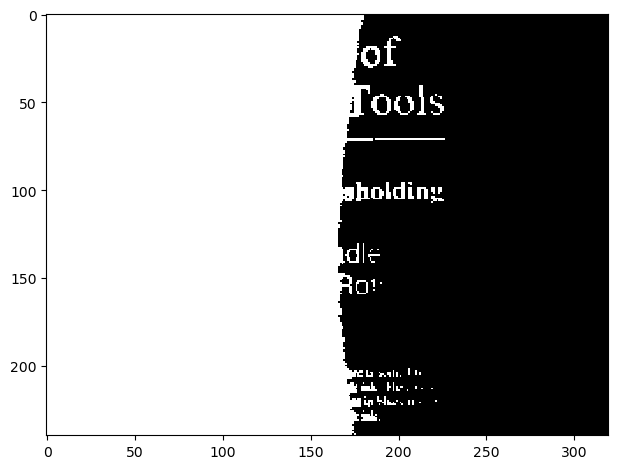

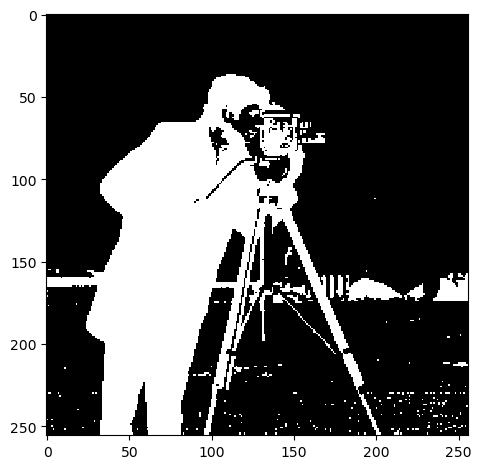

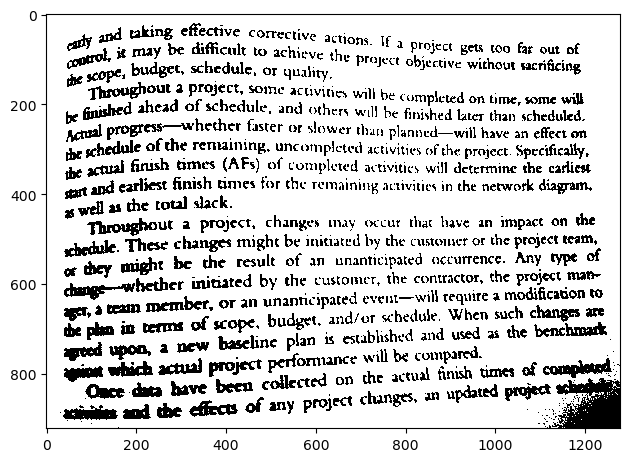

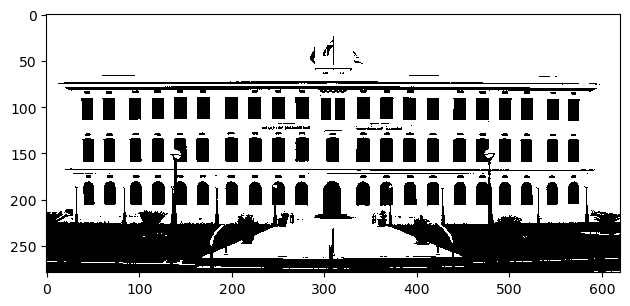

In [68]:
def getThreshold(img):
    img = (img*255).astype('uint8')
    
    counts = np.zeros(256).astype('int')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            counts[img[i][j]] += 1

    cumsum = np.cumsum(counts)
    sum = 0
    for i in range(256):
        sum += i * counts[i]

    Tinit = round(sum / cumsum[255])
    # print(Tinit)

    Told = 0
    Tnew = Tinit

    while (Told != Tnew):
        Told = Tnew
        sum_lower = 0
        for i in range(Told):
            sum_lower += i * counts[i]
    
        lower_mean = round (sum_lower / cumsum[Told - 1])
    
        sum_higher = 0
        for i in range(Told, 256):
            sum_higher += i * counts[i]
    
        higher_mean = round(sum_higher / (cumsum[255] - cumsum[Told - 1]))
    
        Tnew = round((lower_mean + higher_mean) / 2)
        # print(Tnew)
    
    binarized_image = np.where(img < Tnew, 0, 255).astype(np.uint8)
    # io.imshow(binarized_image)
    # io.show()
    return binarized_image

io.imshow(getThreshold(io.imread("book.png")))
io.show()

io.imshow(getThreshold(io.imread("cameraman.png")))
io.show()

img_book1 = rgb2gray(io.imread("book1.png"))
img_cufe = rgb2gray(io.imread("cufe.png"))
io.imshow(getThreshold(img_book1))
io.show()

io.imshow(getThreshold(img_cufe))
io.show()

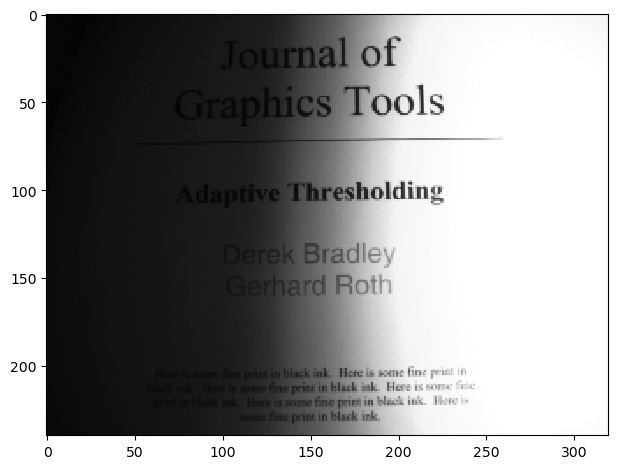

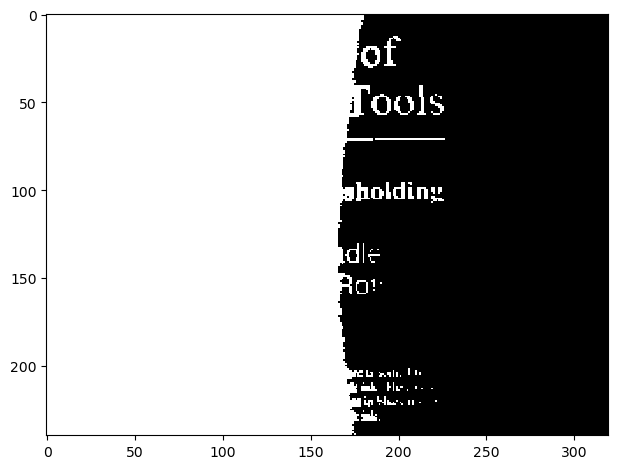

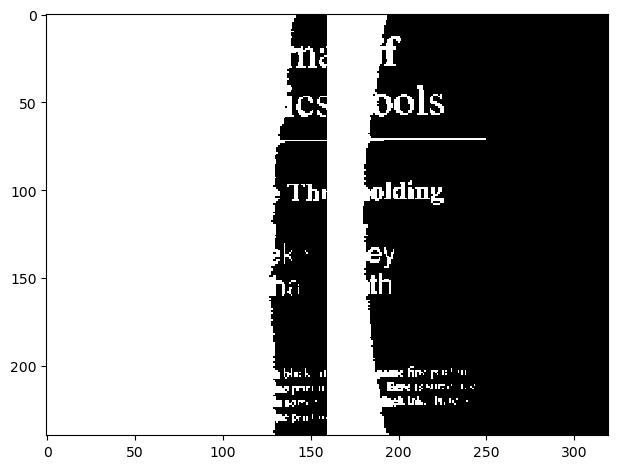

In [69]:
img_book = io.imread("book.png")

d1 = img_book.shape[0]
d2 = img_book.shape[1]

q1 = img_book[:d1//2, :d2//2]
q2 = img_book[:d1//2, d2//2:]
q3 = img_book[d1//2:, :d2//2]
q4 = img_book[d1//2:, d2//2:]

# io.imshow(q1)
# io.show()
# io.imshow(q2)
# io.show()
# io.imshow(q3)
# io.show()
# io.imshow(q4)
# io.show()

q1_T = getThreshold(q1)
q2_T = getThreshold(q2)
q3_T = getThreshold(q3)
q4_T = getThreshold(q4)

io.imshow(img_book)
io.show()

io.imshow(getThreshold(img_book))
io.show()

gathered_image = np.vstack((np.hstack((q1_T, q2_T)), np.hstack((q3_T, q4_T))))
io.imshow(gathered_image)
io.show()